In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [4]:
df=pd.read_csv("train.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df=df.drop(['Cabin'],axis=1)

In [9]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [10]:
df['Age']=df.Age.fillna(df.Age.median())

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [13]:
df['Embarked']=df.Embarked.fillna(df.Embarked.mode()[0])

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df['Family_Size']=df['SibSp']+df['Parch']

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family_Size'],
      dtype='object')

In [17]:
df=df.drop(['PassengerId','Name','Ticket','Fare'],axis=1)

In [18]:
survived_counts = df['Survived'].value_counts()
survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

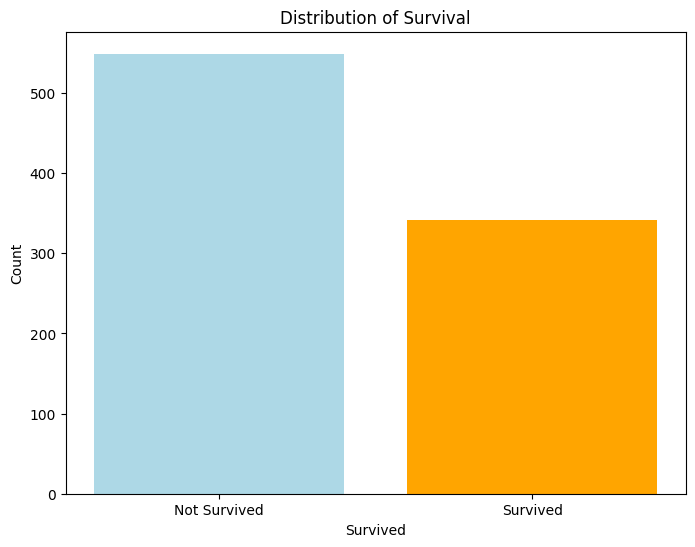

In [19]:
plt.figure(figsize=(8, 6))
plt.bar(survived_counts.index, survived_counts.values, color=['lightblue', 'orange'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survival')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [20]:
sex_count=df['Sex'].value_counts()
sex_count

Sex
male      577
female    314
Name: count, dtype: int64

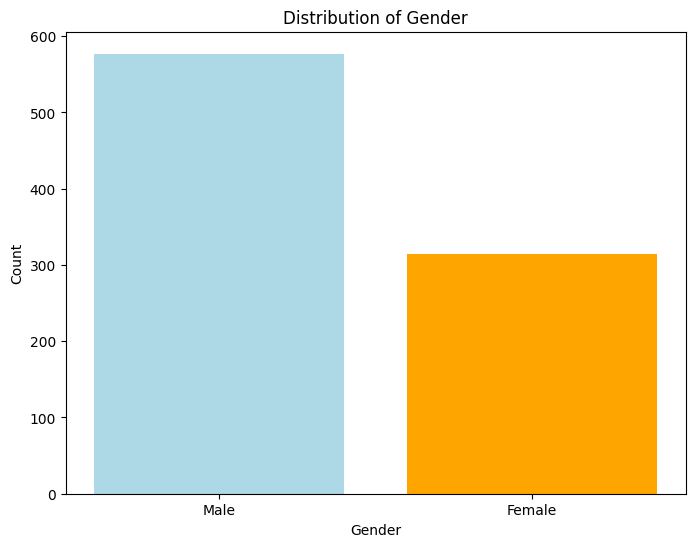

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(sex_count.index, sex_count.values, color=['lightblue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

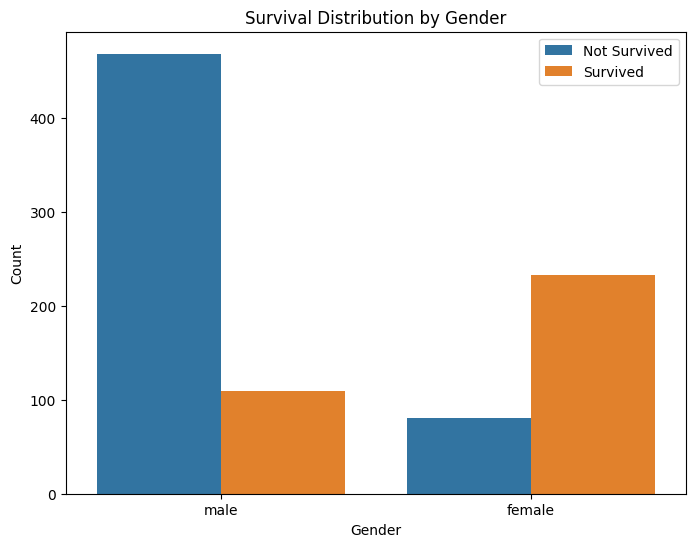

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Distribution by Gender')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

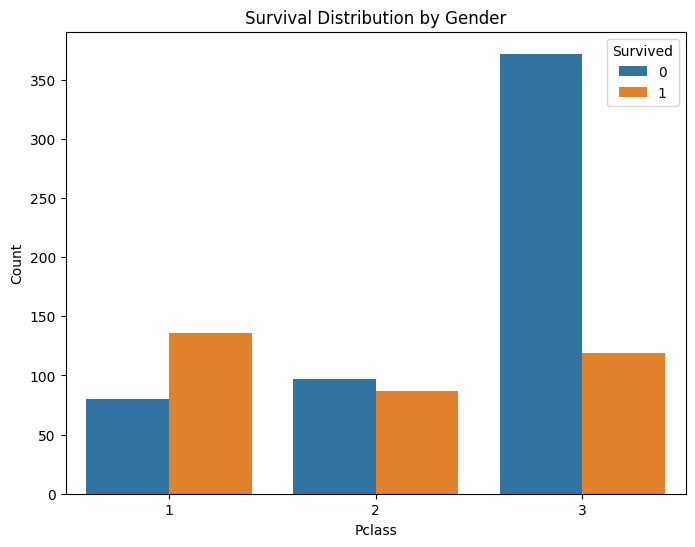

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival Distribution by Gender')
plt.labels=(['Not Survived', 'Survived'])
plt.show()

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family_Size
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,0
887,1,1,female,19.0,0,0,S,0
888,0,3,female,28.0,1,2,S,3
889,1,1,male,26.0,0,0,C,0


In [25]:
dummies = pd.get_dummies(df['Sex'])

In [26]:
df=pd.concat([df,dummies],axis=1)

In [27]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family_Size,female,male
0,0,3,male,22.0,1,0,S,1,False,True
1,1,1,female,38.0,1,0,C,1,True,False
2,1,3,female,26.0,0,0,S,0,True,False


In [28]:
dummies1 = pd.get_dummies(df['Embarked'])

In [29]:
df=pd.concat([df,dummies1],axis=1)

In [30]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family_Size,female,male,C,Q,S
0,0,3,male,22.0,1,0,S,1,False,True,False,False,True
1,1,1,female,38.0,1,0,C,1,True,False,True,False,False
2,1,3,female,26.0,0,0,S,0,True,False,False,False,True


In [31]:
df=df.drop(['Sex','Embarked','S'],axis=1)

In [64]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=42)),
])

In [84]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [86]:
pipe.score(X_test,y_test)

0.7877094972067039